In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# loading data from csv file
sales_data = pd.read_csv(r"D:\study\datasets\advertising.csv")

In [5]:
# first 5 rows
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
sales_data.shape

(200, 4)

In [8]:
# getting info info about dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# checking for null values
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
# describing data
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Average expense spend is lowest on radio
# Average expense spend is highest on tv
# Max sales is 27 and min is 1.6

In [13]:
import plotly.express as px

# Scatter plot

In [53]:
# scatter plot
px.scatter_matrix(sales_data,["TV","Radio","Newspaper","Sales"])

# Histrogram plot

<Axes: ylabel='Frequency'>

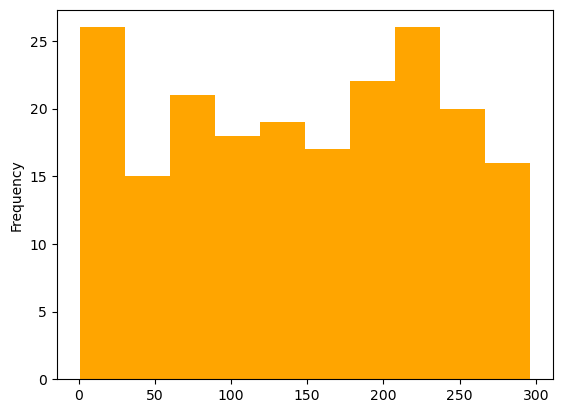

In [22]:
sales_data['TV'].plot.hist(bins=10, color='orange', xlabel ='TV')

<Axes: ylabel='Frequency'>

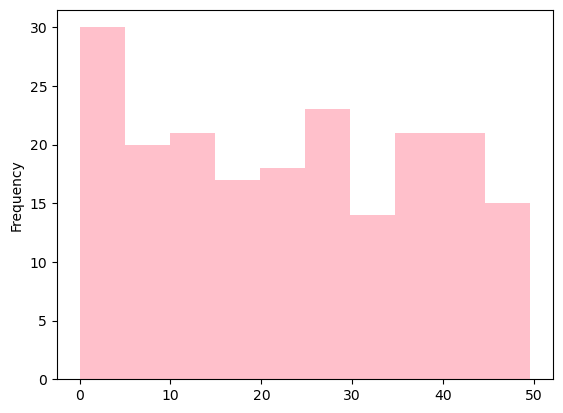

In [26]:
sales_data['Radio'].plot.hist(bins=10, color='pink', xlabel ='Radio')

<Axes: ylabel='Frequency'>

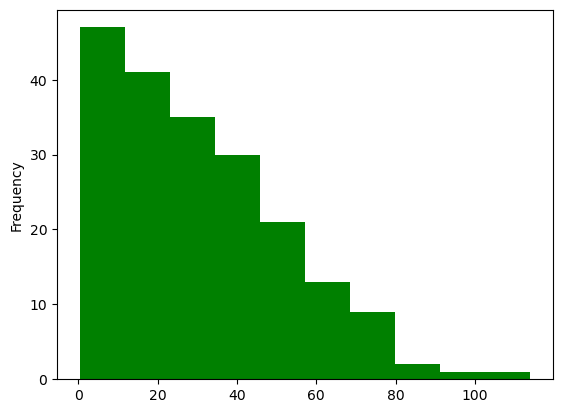

In [24]:
sales_data['Newspaper'].plot.hist(bins=10, color='green', xlabel ='Newspaper')

# Heatmap of correlation

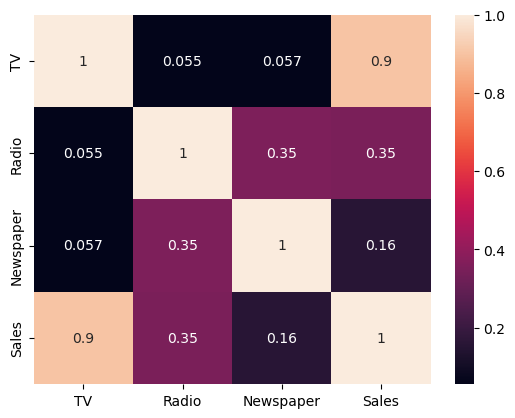

In [28]:
sns.heatmap(sales_data.corr(), annot = True)
plt.show()

# sales is highly correlated to tv

In [31]:
data1 = sales_data.copy()

In [34]:
from scipy import stats

In [35]:
# Scaling
for i in data1.columns:
    data1[i]=stats.zscore(data1[i])

# Train test split

In [37]:
x= data1.drop('Sales',axis=1)
y=data1['Sales']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# Model evaluation

In [43]:
# predict target for test data
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)

In [49]:
# root mean squared error
mean_squared_error(y_test,y_pred)**0.5

0.264326208524069

In [51]:
# r2 value
r2_score(y_test, y_pred)

0.9460777438143407

# Concluding that the above mentioned solution is successfully able to predict sales using advertissement dataset